(sec-errors-ms)=
# Errori di tipo *m* (magnitude) e di tipo *s* (sign)

{cite}`loken2017measurement` hanno messo in relazione la procedura di decisione statistica dell'approccio frequentista con la crisi della replicabilità dei risultati della ricerca. Uno dei problemi che hanno messo in evidenza riguarda il fatto che, in contesti di ricerca rumorosi, la significatività statistica fornisce prove molto deboli per il segno o la grandezza di qualsiasi effetto sottostante. Questo punto è meglio chiarito con una simulazione.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Supponiamo di selezionare due campioni casuali indipendenti di ampiezza $n_1$ = 20 e $n_2$ = 25 dalle distribuzioni $\mathcal{N}(102, 10)$ e $\mathcal{N}(100, 10)$. 

La vera grandezza dell'effetto per la differenza tra le medie delle due campioni è

$$
d = \frac{\bar{y}_1 - \bar{y}_1}{s_p}
$$

dove

$$
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}
$$

Nel caso presente, il vero valore della grandezza dell'effetto è $\delta = 0.2$. Questo è un effetto estremamente piccolo per gli standard correnti e descrive una differenza che non deve essere presa in nessuna seria considerazione.

Ma vediamo quali sarebbero, in queste circostanze, le conclusioni della procedura statistica di decisione statistica basata sull'approccio frequentista. Facciamo una simulazione in cui estraiamo un campione di 20 osservazioni dalla prima popolazione e un campione di 25 osservazioni dalla seconda popolazione. Eseguiamo il test $t$ di Student.  Seguendo la pratica corrente dell'approccio frequentista, se il valore-$p$ > 0.05, i risultati vengono scartati. Se invece il risultato è *statisticamente significativo* (ovvero, valore-$p$ < 0.05), allora il risultato è considerato "pubblicabile". A quali conclusioni giunge la procedura frequentista in questo caso?

Per rispondere a questa domanda, eseguimo la procedura descritta sopra 50,000 volte. 

In [64]:
n_samples = 50000
mu_1 = 102
mu_2 = 100
sigma = 10
n1 = 20
n2 = 25

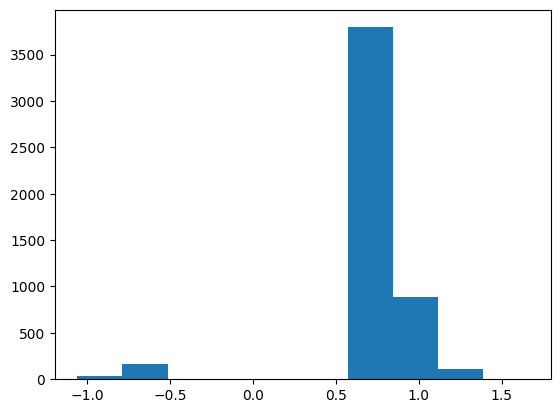

In [65]:
res = []

for i in range(n_samples):
    # Get random samples 
    y1 = np.random.normal(loc=mu_1, scale=sigma, size=n1)
    y2 = np.random.normal(loc=mu_2, scale=sigma, size=n2)
    # Compute effect size
    y1bar = y1.mean()
    y2bar = y2.mean()
    v1 = np.var(y1, ddof=1)
    v2 = np.var(y2, ddof=1)
    s = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2 - 2))
    efsize = (y1bar - y2bar) / s
    # Compute p-value
    out = stats.ttest_ind(a=y1, b=y2, equal_var=True)
    # Save effect size only for 'statistically significant' results
    if out.pvalue < 0.05:
        res.append(efsize)


Esaminiamo un istogramma dei casi nei quali il valore-$p$ è stato < 0.05.

In [ ]:
plt.hist(res)
plt.show() 

Come messo in evidenza da {cite}`loken2017measurement`, si verificano due tipi di errori.

Il primo errore è di *magnitude* (errore *m*): in media, i risultati pubblicati sovrastimano la vera grandezza dell'effetto. Nel caso della simulazione, la vera grandezza dell'effetto è 0.2 (trascurabile) ma la media della grandezza dell'effetto dei risulati "statisticamente significativi" è circa 0.8, il che indica una grandezza dell'effetto "grande".

Il secondo errore è di *segno* (errore *s*): in un piccolo numero di casi, per effetto della varibilità campionaria, il segno dell'effetto è sbagliato -- in questi casi il ricercatore conclude che $\mu_2 > \mu_1$ quando questo è falso. Si noti che, anche in questi casi, la grandezza dell'effetto, in termini assoluti, è sovrastimata.

Qui abbiamo esaminato il test $t$ di Student per la differenza tra due campioni.  Ma le conclusioni sarebbero identiche anche se avessimo considerato l'intervallo di fiducia per la differenza tra due medie.

Quale conclusione si può trarre dai risultati di questa simulazione?  L'approccio frequentista è stato proposto come un metodo per decidere tra quali risultati della ricerca ci possiamo fidare e quali invece dobbiamo rifiutare. {cite}`loken2017measurement` mettonon in evidenza come questa "promessa" dell'approccio frequentista non venga mantenuta: l'approccio frequentista introduce un errore sistematico nella stima della grandezza dell'effetto (la quantità più importante che il ricercatore deve stimare) e, in alcuni casi, produce un errore anche nella stima della direzione dell'effetto.

Non vedo dunque alcuno motivo per usare un tale approccio.